# Lab assignment №1, part 2

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the second part of the assignment. First and third parts are waiting for you in the same directory.*__

## Part 2. Data preprocessing, model training and evaluation.

### 1. Reading the data
Today we work with the [dataset](https://archive.ics.uci.edu/ml/datasets/Statlog+%28Vehicle+Silhouettes%29), describing different cars for multiclass ($k=4$) classification problem. The data is available below.

In [1]:
# If on colab, uncomment the following lines

# ! wget https://raw.githubusercontent.com/girafe-ai/ml-course/22f_made/homeworks/lab01_ml_pipeline/car_data.csv

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split

dataset = pd.read_csv('car_data.csv', delimiter=',', header=None).values
data = dataset[:, :-1].astype(int)
target = dataset[:, -1]

print(data.shape, target.shape)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.35)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(846, 19) (846,)
(549, 19) (549,) (297, 19) (297,)


To get some insights about the dataset, `pandas` might be used. The `train` part is transformed to `pd.DataFrame` below.

In [3]:
X_train_pd = pd.DataFrame(X_train)

# First 15 rows of our dataset.
X_train_pd.head(15)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,591,80,36,69,127,56,7,128,53,18,124,147,240,133,70,2,21,183,191
1,683,110,56,109,199,57,5,251,27,27,169,272,928,268,82,11,10,183,183
2,281,82,43,73,154,65,7,151,44,19,143,178,341,160,76,5,11,185,189
3,651,85,40,66,136,58,6,142,48,19,137,164,295,164,77,2,22,182,186
4,227,94,35,66,147,62,9,131,50,18,127,159,258,115,66,8,7,196,201
5,630,86,40,63,135,56,5,133,50,18,135,152,262,166,70,9,2,187,191
6,148,90,43,72,172,59,8,154,42,19,144,174,360,158,61,15,9,203,209
7,112,77,38,75,144,59,6,147,46,19,132,167,315,136,80,16,20,181,187
8,4,85,44,70,205,103,52,149,45,19,144,241,325,188,127,9,11,180,183
9,435,85,37,68,145,60,6,130,51,18,130,150,253,121,65,3,14,195,203


Methods `describe` and `info` deliver some useful information.

In [4]:
X_train_pd.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.00000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000
mean,431.626594,93.610200,44.888889,81.765027,168.285974,61.515483,8.422587,168.684882,41.001821,20.568306,147.990893,188.67031,439.626594,174.546448,72.555556,6.387978,12.398907,188.979964,195.528233
std,241.597725,8.056663,6.216916,15.651350,33.287843,7.561562,4.312171,33.661976,7.868560,2.629385,14.483249,32.27079,179.740214,33.236327,7.684656,4.763065,8.755982,6.175768,7.504842
min,0.000000,76.000000,33.000000,40.000000,104.000000,47.000000,3.000000,112.000000,26.000000,17.000000,118.000000,130.00000,184.000000,109.000000,59.000000,0.000000,0.000000,176.000000,181.000000
25%,225.000000,87.000000,40.000000,70.000000,141.000000,57.000000,7.000000,146.000000,33.000000,19.000000,137.000000,167.00000,317.000000,148.000000,67.000000,2.000000,5.000000,184.000000,190.000000
50%,439.000000,92.000000,45.000000,79.000000,165.000000,61.000000,8.000000,157.000000,43.000000,20.000000,146.000000,178.00000,362.000000,174.000000,72.000000,6.000000,11.000000,188.000000,196.000000
75%,634.000000,100.000000,49.000000,98.000000,194.000000,65.000000,10.000000,198.000000,46.000000,23.000000,159.000000,216.00000,586.000000,198.000000,76.000000,9.000000,18.000000,193.000000,201.000000
max,845.000000,117.000000,58.000000,112.000000,333.000000,138.000000,55.000000,265.000000,61.000000,29.000000,182.000000,320.00000,1018.000000,268.000000,135.000000,22.000000,41.000000,204.000000,211.000000


In [5]:
X_train_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       549 non-null    int32
 1   1       549 non-null    int32
 2   2       549 non-null    int32
 3   3       549 non-null    int32
 4   4       549 non-null    int32
 5   5       549 non-null    int32
 6   6       549 non-null    int32
 7   7       549 non-null    int32
 8   8       549 non-null    int32
 9   9       549 non-null    int32
 10  10      549 non-null    int32
 11  11      549 non-null    int32
 12  12      549 non-null    int32
 13  13      549 non-null    int32
 14  14      549 non-null    int32
 15  15      549 non-null    int32
 16  16      549 non-null    int32
 17  17      549 non-null    int32
 18  18      549 non-null    int32
dtypes: int32(19)
memory usage: 40.9 KB


### 2. Machine Learning pipeline
Here you are supposed to perform the desired transformations. Please, explain your results briefly after each task.

#### 2.0. Data preprocessing
* Make some transformations of the dataset (if necessary). Briefly explain the transformations

In [6]:
## YOUR CODE HERE: здесь я сделал нормализацию данных, используя среднее значение и отклонение.
for i, m, s in zip(X_train_pd.columns, X_train_pd.mean(), X_train_pd.std()):
    X_train_pd[i] = (X_train_pd[i] - m) / s
X_train_pd.head(15)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0.659664,-1.689310,-1.429791,-0.815586,-1.240272,-0.729410,-0.329900,-1.208630,1.524825,-0.976771,-1.656458,-1.291270,-1.110640,-1.250031,-0.332553,-0.921251,0.982310,-0.968295,-0.603375
1,1.040463,2.034316,1.787239,1.740104,0.922680,-0.597163,-0.793704,2.445344,-1.779464,2.446083,1.450580,2.582202,2.717107,2.811789,1.229000,0.968289,-0.273974,-0.968295,-1.669353
2,-0.623460,-1.441068,-0.303831,-0.560017,-0.429165,0.460820,-0.329900,-0.525367,0.381033,-0.596454,-0.344598,-0.330649,-0.548717,-0.437667,0.448224,-0.291404,-0.159766,-0.644448,-0.869870
3,0.908011,-1.068706,-0.786385,-1.007263,-0.969903,-0.464915,-0.561802,-0.792731,0.889385,-0.596454,-0.758869,-0.764478,-0.804642,-0.317317,0.578353,-0.921251,1.096518,-1.130218,-1.269611
4,-0.846972,0.048382,-1.590642,-1.007263,-0.639452,0.064076,0.133903,-1.119509,1.143561,-0.976771,-1.449322,-0.919417,-1.010495,-1.791607,-0.853071,0.338442,-0.616596,1.136707,0.729098
5,0.821090,-0.944585,-0.786385,-1.198940,-0.999944,-0.729410,-0.793704,-1.060095,1.143561,-0.976771,-0.896960,-1.136331,-0.988241,-0.257142,-0.332553,0.548391,-1.187635,-0.320602,-0.603375
6,-1.173962,-0.448101,-0.303831,-0.623910,0.111573,-0.332667,-0.097999,-0.436245,0.126857,-0.596454,-0.275552,-0.454600,-0.443009,-0.497842,-1.503718,1.808084,-0.388181,2.270169,1.795077
7,-1.322970,-2.061672,-1.108088,-0.432233,-0.729575,-0.332667,-0.561802,-0.644195,0.635209,-0.596454,-1.104096,-0.671515,-0.693371,-1.159769,0.968741,2.018033,0.868103,-1.292141,-1.136364
8,-1.769994,-1.068706,-0.142979,-0.751694,1.102926,5.486236,10.105679,-0.584781,0.508121,-0.596454,-0.275552,1.621581,-0.637735,0.404785,7.084825,0.548391,-0.159766,-1.454064,-1.669353
9,0.013963,-1.068706,-1.268939,-0.879479,-0.699534,-0.200419,-0.561802,-1.149216,1.270649,-0.976771,-1.242186,-1.198307,-1.038313,-1.611082,-0.983200,-0.711302,0.182857,0.974783,0.995593


#### 2.1. Basic logistic regression
* Find optimal hyperparameters for logistic regression with cross-validation on the `train` data (small grid/random search is enough, no need to find the *best* parameters).

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` `tol=1e-3` and ` max_iter=500`.*

Best Hyperparameters: {'C': 0.1}
F1 Score: 0.7118352489391754
Accuracy: 0.7138047138047138


<Figure size 1000x600 with 0 Axes>

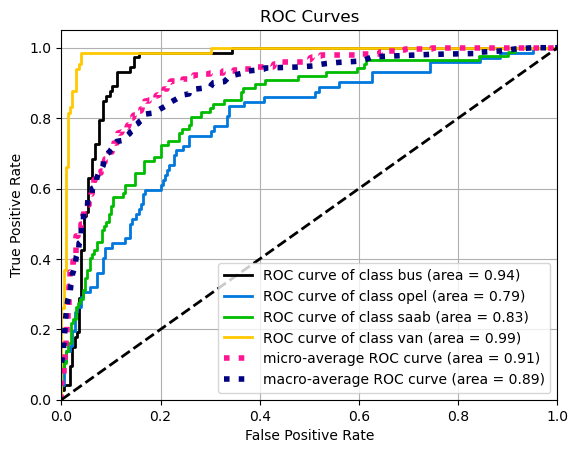

In [7]:
### YOUR CODE HERE
# примеры я смотрел здесь:
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

# ATTENTION: если появится ошибка запуска, то измените max_iter = 1000 или значение больше.

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from scikitplot.metrics import plot_roc
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

reg = LogisticRegression(multi_class = 'multinomial', solver = 'saga', tol = 1e-3, max_iter = 1000)
grid = {'C':[0.01, 0.1, 1, 10]}
gridSearch = GridSearchCV(reg, grid)
gridFit = gridSearch.fit(X_train, y_train)

y_pred = gridFit.predict(X_test) 
y_prob = gridSearch.fit(X_train, y_train)

print(f'Best Hyperparameters: {gridSearch.best_params_}')
print(f'F1 Score: {f1_score(y_test, y_pred, average = "macro")}')
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

# Plot ROC curve:
plt.figure(figsize=(10, 6))
plot_roc(y_test, gridFit.predict_proba(X_test))
plt.grid()
plt.show()

In [8]:
# You might use this command to install scikit-plot. 
# Warning, if you a running locally, don't call pip from within jupyter, call it from terminal in the corresponding 
# virtual environment instead

!pip install scikit-plot

#### 2.2. PCA: explained variance plot
* Apply the PCA to the train part of the data. Build the explaided variance plot. 

PCA ratio: [6.08851607e-01 3.75604106e-01 6.73484083e-03 4.61656416e-03
 1.60572878e-03 7.29739466e-04 5.27996951e-04 4.07422682e-04
 3.01884794e-04 2.24385095e-04 1.38286650e-04 9.75504051e-05
 5.97140812e-05 4.91000699e-05 2.48819836e-05 1.54246275e-05
 7.44162889e-06 2.58440070e-06 7.40896604e-07]


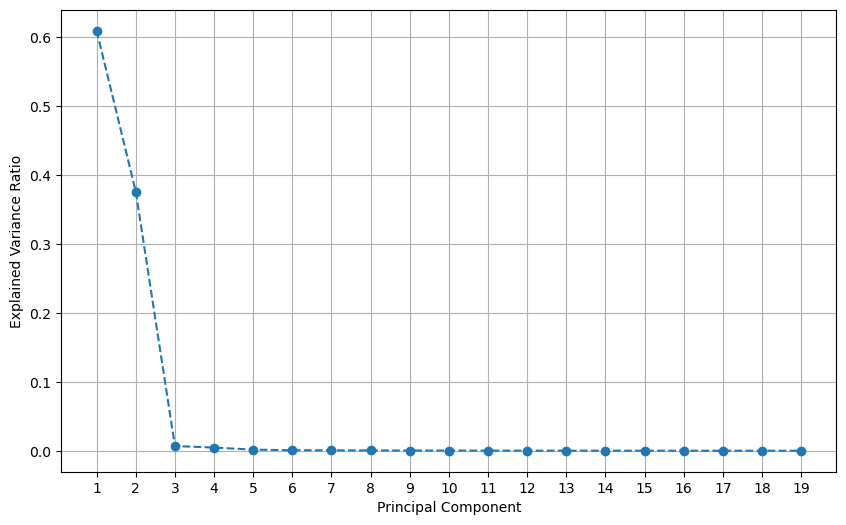

In [9]:
### YOUR CODE HERE
# https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X_train)
ratio = pca.explained_variance_ratio_
print("PCA ratio:", ratio)

# Plot PCA curve:
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(ratio) + 1), ratio, marker = 'o', linestyle = '--')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.xticks(range(1, len(ratio) + 1))
plt.grid()
plt.show()

#### 2.3. PCA trasformation
* Select the appropriate number of components. Briefly explain your choice. Should you normalize the data?

*Use `fit` and `transform` methods to transform the `train` and `test` parts.*

In [10]:
### YOUR CODE HERE

DISP_BORDER = 0.99

# Посчитаем дисперсию при разном количестве компонент и замечаем, что с 3-го компонента почти ничего не меняется:
for index in range(0, 19, 1):
    print(index + 1, np.cumsum(pca.explained_variance_ratio_)[index])
    
nComponents = np.argmax(np.cumsum(pca.explained_variance_ratio_) >= DISP_BORDER) + 1
print("\nAmount of components:", nComponents)

# Будет достаточно двух компонентов, ведь общая объясненная дисперсия уже на этом шаге будет близка к единице.
# Можно выбрать и 3 компонента, но двух будет достаточно (самое главное - не один). Параметр DISP_BORDER можно варьировать.
# Также заметим, что объясненная дисперсия равна единице при 19 компонентах.
# За результатом можно пронаблюдать в следующем пункте в зависимости от числа компонент.

1 0.6088516067130645
2 0.9844557124927987
3 0.9911905533242126
4 0.9958071174851449
5 0.9974128462697827
6 0.9981425857356164
7 0.9986705826866664
8 0.99907800536879
9 0.9993798901624708
10 0.9996042752570309
11 0.9997425619065381
12 0.9998401123116416
13 0.9998998263928321
14 0.9999489264627704
15 0.9999738084463575
16 0.9999892330738089
17 0.999996674702696
18 0.9999992591033956
19 1.0

Amount of components: 3


**Note: From this point `sklearn` [Pipeline](https://scikit-learn.org/stable/modules/compose.html) might be useful to perform transformations on the data. Refer to the [docs](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) for more information.**

#### 2.4. Logistic regression on PCA-preprocessed data.
* Find optimal hyperparameters for logistic regression with cross-validation on the transformed by PCA `train` data.

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` and `tol=1e-3`*

Best Hyperparameters: {'C': 0.1}
F1 Score: 0.7547173432426375
Accuracy: 0.7542087542087542


<Figure size 1000x600 with 0 Axes>

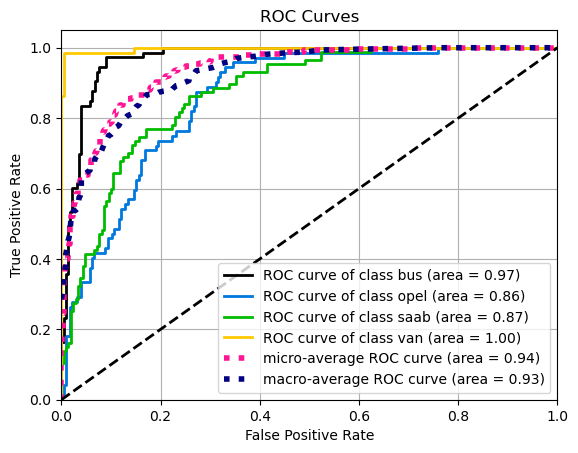

In [14]:
### YOUR CODE HERE
# Я написал функцию, в которую можно подставлять разное число компонент. В данном случае подставляется для 19, но можно выбрать
# и другое значение, например, исходя из рассуждений в предыдущем пункте.

N_COMPONENTS = 19

def execute(n_components):
    pcaOpt = PCA(n_components)
    pcaOpt.fit(X_train)
    X_train_pca = pcaOpt.fit_transform(X_train)
    X_test_pca = pcaOpt.transform(X_test)
    
    reg = LogisticRegression(multi_class = 'multinomial', solver = 'saga', tol = 1e-3, max_iter = 1000)
    grid = {'C':[0.01, 0.1, 1, 10]}
    gridSearch = GridSearchCV(reg, grid)
    gridFit = gridSearch.fit(X_train_pca, y_train)
    
    return X_train_pca, X_test_pca, gridSearch, gridFit
    
X_train_PCA, X_test_PCA, gridSearch, gridFit = execute(N_COMPONENTS)
y_pred = gridFit.predict(X_test_PCA) 
y_prob = gridSearch.fit(X_train_PCA, y_train)

print(f'Best Hyperparameters: {gridSearch.best_params_}')
print(f'F1 Score: {f1_score(y_test, y_pred, average = "macro")}')
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

# Plot ROC curve:
plt.figure(figsize=(10, 6))
plot_roc(y_test, gridFit.predict_proba(X_test_PCA))
plt.grid()
plt.show()

#### 2.5. Decision tree
* Now train a desicion tree on the same data. Find optimal tree depth (`max_depth`) using cross-validation.

* Measure the model quality using the same metrics you used above.

BEST PARAMS: {'max_depth': 65}
F1 Score: 0.700373684072057
Accuracy: 0.6868686868686869


<Figure size 1000x600 with 0 Axes>

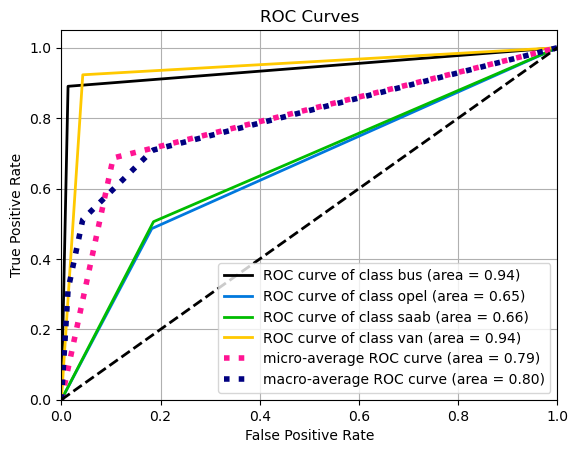

In [15]:
from sklearn.tree import DecisionTreeClassifier

# YOUR CODE HERE
gridSearch = GridSearchCV(DecisionTreeClassifier(), param_grid = {'max_depth': np.arange(10, 100, 5)})
gridFit = gridSearch.fit(X_train, y_train)

print("BEST PARAMS:", gridFit.best_params_)

bestEst = gridSearch.best_estimator_
bestEst.fit(X_train, y_train)
y_pred = bestEst.predict(X_test)

print(f'F1 Score: {f1_score(y_test, y_pred, average = "macro")}')
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

# Plot curve:
plt.figure(figsize=(10, 6))
plot_roc(y_test, gridFit.predict_proba(X_test))
plt.grid()
plt.show()

#### 2.6. Bagging.
Here starts the ensembling part.

First we will use the __Bagging__ approach. Build an ensemble of $N$ algorithms varying N from $N_{min}=2$ to $N_{max}=100$ (with step 5).

We will build two ensembles: of logistic regressions and of decision trees.

*Comment: each ensemble should be constructed from models of the same family, so logistic regressions should not be mixed up with decision trees.*


*Hint 1: To build a __Bagging__ ensebmle varying the ensemble size efficiently you might generate $N_{max}$ subsets of `train` data (of the same size as the original dataset) using bootstrap procedure once. Then you train a new instance of logistic regression/decision tree with optimal hyperparameters you estimated before on each subset (so you train it from scratch). Finally, to get an ensemble of $N$ models you average the $N$ out of $N_{max}$ models predictions.*

*Hint 2: sklearn might help you with this taks. Some appropriate function/class might be out there.*

* Plot `f1` and `accuracy` scores plots w.r.t. the size of the ensemble.

* Briefly analyse the plot. What is the optimal number of algorithms? Explain your answer.

* How do you think, are the hyperparameters for the decision trees you found in 2.5 optimal for trees used in ensemble? 

In [ ]:
# YOUR CODE HERE
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html

from sklearn.ensemble import BaggingClassifier

ensemble = np.arange(2, 100, 5)

def bagging(est):
    f1Scores = []
    acScores = []
    
    for i in ensemble:
        bagClassifier = BaggingClassifier(est, i)
        bagClassifierFit = bagClassifier.fit(X_train, y_train)
        y_pred = bagClassifierFit.predict(X_test)
        f1Scores.append(f1_score(y_test, y_pred, average = 'macro'))
        acScores.append(accuracy_score(y_test, y_pred))
        
    print(f'f1:{np.array(f1Scores)} -> {np.mean(np.array(f1Scores))}\n')
    print(f'accuracy:{np.array(acScores)} -> {np.mean(np.array(acScores))}')
    
    return f1Scores, acScores

# DECISION TREE CLASSIFIER:
f1Scores, acScores = bagging(DecisionTreeClassifier())

plt.xlabel("Estimators")
plt.ylabel("Metric score")
plt.plot(ensemble, f1Scores, label = 'f1')
plt.plot(ensemble, acScores, label = 'accuracy')
plt.legend(loc = 'lower right')
plt.show()

In [ ]:
# LOGISTIC REGRESSION:
f1Scores, acScores = bagging(LogisticRegression(multi_class = 'multinomial', solver = 'saga', tol = 1e-3, max_iter = 500))

plt.xlabel("Estimators")
plt.ylabel("Metric score")
plt.plot(ensemble, f1Scores, label = 'f1')
plt.plot(ensemble, acScores, label = 'accuracy')
plt.legend(loc = 'lower right')
plt.show()

#### 2.7. Random Forest
Now we will work with the Random Forest (its `sklearn` implementation).

* * Plot `f1` and `accuracy` scores plots w.r.t. the number of trees in Random Forest.

* What is the optimal number of trees you've got? Is it different from the optimal number of logistic regressions/decision trees in 2.6? Explain the results briefly.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# YOUR CODE HERE
ensemble = np.arange(2, 100, 5)

f1Scores = []
acScores = []
f1Scores, acScores = bagging(RandomForestClassifier())
plt.xlabel("Estimators")
plt.ylabel("Metric score")
plt.plot(ensemble, f1Scores, label = 'f1')
plt.plot(ensemble, acScores, label = 'accuracy')
plt.legend(loc = 'lower right')
plt.show()

#### 2.8. Learning curve
Your goal is to estimate, how does the model behaviour change with the increase of the `train` dataset size.

* Split the training data into 10 equal (almost) parts. Then train the models from above (Logistic regression, Desicion Tree, Random Forest) with optimal hyperparameters you have selected on 1 part, 2 parts (combined, so the train size in increased by 2 times), 3 parts and so on.

* Build a plot of `accuracy` and `f1` scores on `test` part, varying the `train` dataset size (so the axes will be score - dataset size.

* Analyse the final plot. Can you make any conlusions using it? 

In [ ]:
# YOUR CODE HERE